In [1]:
import sqlite3

db = sqlite3.connect('IMDB.sqlite')
db #connection object 

In [2]:
db = sqlite3.connect('IMDB_1.sqlite')
db
#no error even if we specify a file that doesnt exist
#if doesnt exist creates that file

In [3]:
db = sqlite3.connect('School.sqlite')
db

In [59]:
cur = db.cursor()
cur
#cursor obj so that we can execute sql statements
#connectionobj.cursor()

In [10]:
#text-specifies string in sqlite
sql_query = 'Create table Student (RollNumber int Primary key, Name Text, Age int)'
cur.execute(sql_query)

In [11]:

cur.execute('Insert into Student values (101, "Aman", 20)')

In [12]:
db.commit()

In [13]:
cur.execute('Insert into Student values (102, "Amit", 21)')

In [14]:
db.commit()

In [15]:
db.close()

In [16]:
cur.execute('Insert into Student values (102, "Amit", 21)')

ProgrammingError: Cannot operate on a closed database.

In [37]:
cur.execute('Insert into Student values (103, "Mohit", 24)')

In [38]:
db.commit()

In [39]:
rollNumber = 104
Name = "Nikhil"
age = 34

cur.execute('Insert into Student values (?, ?, ?)', (rollNumber, Name, age))

In [40]:
db.commit()

In [41]:
values = [(105, "Nidhi", 20), (106, "Manisha", 21), (107, "Ankush", 22)]
cur.executemany('Insert into Student values (?, ?, ?)', values)


In [42]:
db.commit()

In [43]:
cur.execute('Update Student set Age = 30')

In [44]:
db.commit()

In [45]:
cur.execute('Update Student set Age = 20 where RollNumber = 102')
db.commit()

In [46]:
new_age = 50
cur.execute('Update Student set Age = ? where RollNumber = 103', (new_age, ))
#new age, to create it as a tuple

In [47]:
db.commit()

## Fetch data

In [60]:
cur.execute('Select * from Student')

In [61]:
for row in cur :
    print(row)

(101, 'Aman', 30)
(102, 'Amit', 20)
(103, 'Mohit', 50)
(104, 'Nikhil', 30)
(105, 'Nidhi', 30)
(106, 'Manisha', 30)
(107, 'Ankush', 30)


In [62]:
cur.execute('Select * from Student')
print(cur.fetchone())
print(cur.fetchone())

(101, 'Aman', 30)
(102, 'Amit', 20)


In [63]:
cur.execute('Select * from Student')
print(cur.fetchmany(3))

[(101, 'Aman', 30), (102, 'Amit', 20), (103, 'Mohit', 50)]


In [64]:
cur.execute('Select * from Student')
print(cur.fetchmany())

[(101, 'Aman', 30)]


In [65]:
cur.execute('Select * from Student')
ans = cur.fetchall()
ans

[(101, 'Aman', 30),
 (102, 'Amit', 20),
 (103, 'Mohit', 50),
 (104, 'Nikhil', 30),
 (105, 'Nidhi', 30),
 (106, 'Manisha', 30),
 (107, 'Ankush', 30)]

In [66]:
cur.execute('Select * from Student where RollNumber > 103')
print(cur.fetchall())

[(104, 'Nikhil', 30), (105, 'Nidhi', 30), (106, 'Manisha', 30), (107, 'Ankush', 30)]


In [67]:
cur.execute('Select * from Student where Name like "A%"')
print(cur.fetchall())

[(101, 'Aman', 30), (102, 'Amit', 20), (107, 'Ankush', 30)]


## SQLite with pandas

In [77]:
import sqlite3
import pandas as pd

db = sqlite3.connect('School.sqlite')

In [78]:
data = pd.read_sql_query("Select * from Student", db)
data
###dataframe obtained now a lot of operations can be implemented

,RollNumber,Name,Age
0,101,Aman,30
1,102,Amit,20
2,103,Mohit,50
3,104,Nikhil,30
4,105,Nidhi,30
5,106,Manisha,30
6,107,Ankush,30


In [79]:
data[data['Age'] == 30]

,RollNumber,Name,Age
0,101,Aman,30
3,104,Nikhil,30
4,105,Nidhi,30
5,106,Manisha,30
6,107,Ankush,30


In [80]:
# one list represents one row
data = pd.DataFrame([[201, "Aman", "English", 20000], [202, "Komal", "Maths", 22000], [203, "Mahesh", "Science", 23000]], 
                   columns = ["ID", "Name", "Course", "Salary"])
data

,ID,Name,Course,Salary
0,201,Aman,English,20000
1,202,Komal,Maths,22000
2,203,Mahesh,Science,23000


In [81]:
data.to_sql("Faculty", db)

In [82]:
data = pd.read_sql_query("Select * from Student", db)
data["Address"] = "Test"
data.to_sql("Student", db, if_exists = "replace")

# EXERCISE:

When should be indexes created in Table?

indexes are used where values are in vast range so that they can be easily accessed 
moreover there is a condition that there should not be null values in large proportion

In [84]:
db=sqlite3.connect('employee.sqlite');
db


In [85]:
cur=db.cursor();
cur

In [21]:
que='Create table employeedetail (employeeid int primary key,name text,age int,department text,salary int)'

In [22]:
cur.execute(que);

In [32]:
cur.execute("Insert into employeedetail values(102,'aman',24,'human resources',75000)")

In [33]:
db.commit()

In [50]:
cur.execute('delete from employeedetail where employeeid="101"')

In [52]:
db.commit()

In [53]:
id=102
cur.execute('delete from employeedetail where employeeid=?',(id,))

In [54]:
db.commit()

Update SQL Table

A given data of 12 Employees working in an investment firm. So add the Employee Data in Employee SQLite Database of Employee_Detail Table which was created by you.

In [86]:
## Open and read data file as specified in the question
## Print the required output in given format
import sqlite3
db=sqlite3.connect('employee.sqlite');
cur = db.cursor()
employee_id=[101,102,103,104,105,106,107,108,109,110,111,112,113]
name=['Aadarsh','Aarti','Siddharth','Aman','Amit','Shivansh','Vaibhav','Himanshu','Raman','Kunal','Adhira','Tanya']
age=[25,27,25,24,30,26,23,26,25,26,29,24]
department=['Marketing','Operations','Finance','Human Resource','Marketing','IT','Finance','IT','Operations','Marketing','Human Resource','Marketing']
salary=[50000,60000,85000,75000,50000,90000,85000,90000,60000,50000,75000,50000] 
for i in range(12):
    cur.execute('Insert into employeedetail values (?, ?, ?,?,?)', (employee_id[i],name[i], age[i],department[i],salary[i]))
    db.commit();

IntegrityError: UNIQUE constraint failed: employeedetail.employeeid

Finance Employee SQLite

Find the employee_id of employee whose is working in Finance Department in Investment firm from Employee SQLite Database.

Print the employee_id as integer value


In [72]:
cur.execute('select employeeid from employeedetail where department="Finance"')

In [73]:
cur.fetchall()

[(103,), (107,)]

Find Employee
Send Feedback
Find the number of employee working in different department in an investment firm from Employee SQLite Database.
Print the department and number of employee
Output Format:
department_1 num_employee_1
department_2 num_employee_2
department_3 num_employee_3
.  .  . 

In [87]:
cur.execute('delete from employeedetail where employeeid="100"')

In [89]:
db.commit()

In [90]:
cur.execute('select Department,count(*) from EmployeeDetail group by Department')
ans=cur.fetchall()
for i in ans:
    print(i[0],i[1]) 

Finance 2
Human Resource 2
IT 2
Marketing 4
Operations 2


In [92]:
import sqlite3
import pandas as pd

db = sqlite3.connect('IMDB.sqlite')

In [100]:
data = pd.read_sql_query("Select genre,count(*) from genre group by genre", db)
data
print(data.count())
# /for i in range(data.count()):
#     pass

genre       21
count(*)    21
dtype: int64


IMDB Movie

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database.
Print the rating of that movie.

In [171]:
import sqlite3
import pandas as pd

db = sqlite3.connect('IMDB.sqlite')
df = pd.read_sql_query("Select i.Movie_id,domestic,worldwide,rating from earning e join IMDB i on i.movie_id=e.movie_id", db)

df['gross']=df['Domestic'] + df['Worldwide']
max_p=df.Rating[df.gross.argmax()]
max_p

8.1

### IMDB Voted

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the most voted movie in IMDB Movie Database.
Print the movie name and the rating of that movie

In [184]:
import sqlite3
import pandas as pd

db = sqlite3.connect('IMDB.sqlite')
df = pd.read_sql_query("Select Title,rating,totalVotes from IMDB", db)

max_vote=max(df['TotalVotes'].values)
movie_name=df[df['TotalVotes']==max_vote].values
print(movie_name[0][0],movie_name[0][1])


Inception (2010) 8.8


In [183]:
movie_name

,Title,Rating,TotalVotes
45,Inception (2010),8.8,1609713


In [207]:
import sqlite3
import pandas as pd

db = sqlite3.connect('IMDB.sqlite')
mov = pd.read_sql_query("Select Title,rating,totalVotes from IMDB", db)

mov.sort_values(by="TotalVotes",inplace=True)
mov.sort_values(by="TotalVotes",inplace=True,ascending=False)
mov.reset_index(drop=True,inplace=True)

print(mov.Title[0],end=" ")
print(mov.Rating[0])
# print(mov.TotalVotes[0])

Inception (2010) 8.8
1609713


In [212]:
import sqlite3
import pandas as pd

db = sqlite3.connect('IMDB.sqlite')
mov = pd.read_sql_query("Select Title,rating,totalVotes from IMDB order by TotalVotes desc limit 1", db)
mov

,Title,Rating,TotalVotes
0,Inception (2010),8.8,1609713


#### IMDB running time

IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the Movie with Longest-Running Time from IMDB Movie database.
Print the name of movie and running time as integer value.
Note: Don't print 'min' in running time.
Output Format:

In [259]:
## Open and read data file as specified in the question
## Print the required output in given format
import sqlite3
import pandas as pd

db = sqlite3.connect('IMDB.sqlite')
mov = pd.read_sql_query("Select Title,runtime from IMDB", db)

mov.sort_values(by="Runtime",inplace=True)
mov.sort_values(by="Runtime",inplace=True,ascending=False)
mov.reset_index(drop=True,inplace=True)

print(mov.Title[0],end=" ")
print(mov.Runtime[0])

The Grand Budapest Hotel (2014) 99 min


In [282]:
## Open and read data file as specified in the question
## Print the required output in given format
import sqlite3
import pandas as pd

db = sqlite3.connect('IMDB.sqlite')
mov = pd.read_sql_query("Select Title,runtime from IMDB", db)

mov.Runtime.dropna()
# mov.Runtime.isnull().sum()
mov['run']=mov['Runtime'].str.replace(" min","")
mov['run']=mov['run'].astype(float)
mov.sort_values(by="run",inplace=True,ascending=False)
mov.reset_index(drop=True,inplace=True)

print(mov.Title[0],end=" ")
print(mov.run[0])
# # print(mov.TotalVotes[0])

ValueError: could not convert string to float: ''

### IMDB profit

IMDB.sqlite database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the movie which has maximum net profit in IMDB Movie Database.
Print the movie name.
Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

In [144]:
import sqlite3
import pandas as pd

db = sqlite3.connect('IMDB.sqlite')
df = pd.read_sql_query("Select budget,title,domestic,worldwide from earning e join IMDB i on i.movie_id=e.movie_id", db)
df.info()
df["Budget"] = df["Budget"].astype(float)
df['profit']=df['Domestic'] + df['Worldwide'] - df['Budget']



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Budget     117 non-null    object 
 1   Title      117 non-null    object 
 2   Domestic   117 non-null    int64  
 3   Worldwide  117 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.8+ KB


ValueError: could not convert string to float: ''

In [269]:
import sqlite3
import pandas as pd 
db=sqlite3.connect('IMDB.sqlite')
data=pd.read_sql_query("select title from IMDB join earning on imdb.movie_id=earning.movie_id order by domestic desc,worldwide desc,budget ",db)
data

,Title
0,Star Wars: The Force Awakens (2015)
1,The Avengers (2012)
2,Rogue One (2016)
3,The Dark Knight Rises (2012)
4,The Hunger Games: Catching Fire (2013)
...,...
112,Short Term 12 (2013)
113,"I, Daniel Blake (2016)"
114,Tucker and Dale vs Evil (2010)
115,Detachment (2011)


In [330]:
import sqlite3
import pandas as pd 
db=sqlite3.connect('IMDB.sqlite')

df=pd.read_sql_query("select title,budget,i.movie_id,domestic,worldwide from imdb i join earning e on i.movie_id=e.movie_id order by budget",db)
df.Budget.dropna(inplace=True)
df = df[df.Budget != '']

if (df.Budget[0]!=df.Budget[1]):
    print(df.Title)
else:
    df["Budget"] = df["Budget"].astype(float)
    df['profit']=df['Domestic'] + df['Worldwide'] - df['Budget']
    df.sort_values(by="profit",inplace=True,ascending=False)
    print(df.Title[0])

Short Term 12 (2013)


### IMDB Year Top

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database year wise.
Print the Year and name of the movie which was the highest grosser in that year.
Note:Print the year in ascending order.

In [260]:
import sqlite3
import pandas as pd
import numpy as np

db = sqlite3.connect('IMDB.sqlite')
df= pd.read_sql_query("Select title,i.Movie_id,domestic,worldwide from earning e join IMDB i on i.movie_id=e.movie_id", db)

df["Movie_id"] = df["Movie_id"].astype(float)

df['totprof']=df['Domestic'] + df['Worldwide']
df['year']=df.Title.apply(lambda x:str(x) [-5:] . replace(")",""))
df1=df.groupby('year')
df1.totprof.max()

year
2010    1.481975e+09
2011    6.585612e+08
2012    2.142171e+09
2013    1.289680e+09
2014    1.106505e+09
2015    3.004886e+09
2016    1.588235e+09
Name: totprof, dtype: float64

In [230]:
df.year.unique()

array(['2013', '2010', '2011', '2012', '2016', '2014', '2015'],
      dtype=object)

In [267]:
x=pd.DataFrame(df1.totprof.max())
y=x.merge(df,on='totprof')
for i in range(y.shape[0]):
    print(y.year[i],y.Title[i])

2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


### IMDB genre budget


IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find out the percentage of the budget for each genre in IMDB Movie Dataset?Plot the pie chart.
Print the genre and percentage of movies budget present in that genre with 2 decimal place after rounding off.

Note: Movies has multiple genres, so calculate the percentage for each genre.Replace empty budget column to zero.

In [329]:
import sqlite3
import pandas as pd
import numpy as np

db=sqlite3.connect("IMDB.sqlite")
df=pd.read_sql_query("Select genre,budget,i.movie_id from imdb i join genre g where i.movie_id=g.movie_id",db)
d={}
df.Budget.dropna(inplace=True)
df = df[df.Budget != '']
df.Budget.astype(float)
for i in range(df.shape[0]):
    if df.genre[i] not in d:
        d[df.genre[i]]=df.Budget[i]
    else:
        d[df.genre[i]] =  df.Budget[i]


KeyError: 66

In [328]:
## Open and read data file as specified in the question
## Print the required output in given format
import sqlite3
import pandas as pd
import numpy as np
db=sqlite3.connect('IMDB.sqlite')

data=pd.read_sql_query('select Title from IMDB join genre on IMDB.Movie_id=genre.Movie_id where rating >= 8 and genre="Sci-Fi" or genre="Mystery"',db)
print(data.loc[0].values[0],end=" ")

Arrival (2016) 

### IMDB genre earning

IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.
Find out the percentage of the total earning for each genre in IMDB Movie Dataset?Plot the pie chart.
Print the genre and percentage of movies total earning present in that genre with 2 decimal place after rounding off.
Note: Movies has multiple genres, so calculate the percentage for each genre.Total Earning=Domestic earning + WorldWide earning.

Action 17.91
Adventure 23.57
Animation 6.77
Biography 3.42
Comedy 7.69
Crime 1.55
Drama 11.96
Family 1.05
Fantasy 5.15
History 1.04
Horror 0.01
Music 0.43
Musical 0.38
Mystery 2.01
Romance 1.45
Sci-Fi 9.95
Sport 0.32
Thriller 4.42
War 0.25
Western 0.65


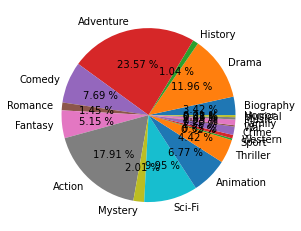

In [333]:
  import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

db=sqlite3.connect("IMDB.sqlite")
df=pd.read_sql_query("Select genre,domestic,worldwide from earning e join genre g where e.movie_id=g.movie_id",db)
d={}
df.Domestic.dropna(inplace=True)
df = df[df.Domestic != '']
df.Domestic.astype(float)

df.Worldwide.dropna(inplace=True)
df = df[df.Worldwide != '']
df.Worldwide.astype(float)

df['prof']=df['Domestic']+df['Worldwide']

for i in df.index:
    if(df['genre'][i] != ''):
        d[df['genre'][i]] = d.get(df['genre'][i],0) + df["prof"][i]
        
total_prof= sum(d.values())
for i in sorted(d):
    print(i,format(round(d[i]*100/total_prof , 2),'.2f'))
    
plt.pie(d.values(),labels = d.keys(),autopct = "%.2f %%")
plt.show()